# Gentle introduction to Machine Learning and Deep Learning

**Machine Learning**, **Deep Learning**, and **Artificial Intelligence** are three popular, fast-growing fields of computer science with many applications.
Despite the terms are often used interchangeably, these terms are not actually synonymous. **Deep Learning** is a subset of **Machine Learning**, while **Artificial Intelligence** (or **AI**) is an umbrella term for both of them. One of the major common things between these three fields is that all of them share a focus on developing algorithms to make *predictions*. The particular algorithms, however, are what makes them different. 

- Machine Learning uses various techniques (including many statistical methods) to teach computer systems how to learn from data without explicit programming.
- Deep Learning uses deep neural networks with multiple layers of processing units to extract features and recognize patterns from data.
- AI is the most comprehensive term for techniques that enable machines to imitate human intelligence. It encompasses reinforcement learning, beyond deep learning and machine learning.

<div align="center">
    <img style="width:30%" src="https://i.ibb.co/vwz7QWJ/Group-6.png">
</div>  

In this tutorial, we will mainly discuss the core principles of Machine Learning and briefly dive into the topic that can be considered the foundation of Deep Learning. The goal of this tutorial is not to tell you all of the topics in both Machine Learning and Deep Learning but rather teach you the major terminology used in the fields so you are capable of following discussion in the field. 

## Linear Regression

One of the simplest machine learning algorithms is **linear regression**. **Linear regression** is a statistical method for finding the line or curve (in higher dimensions) that best fits a set of data points. It is used to *predict* a continuous value, such as the price of a house, given some input information, such as the size of the house and the number of bedrooms.

In statistics, you might have learned about **linear regression** in a bit different context. In statistics, the linear model is often used to support statistically the existence of a relationship between two or more variables. In machine learning, however, we are more interested in the predictive power of the same model. Having some observed data, which in machine learning we call *training data*, we want to find a model that can predict the values of the *target* variable for new unobserved data points called *test set*.

<div align="center">
    <img src="https://dezyre.gumlet.io/images/blog/probability-and-statistics-for-machine-learning/image_60135806631632916840547.png?w=900&dpr=2.0">
</div> 

*Image source: [LehmanBrotha](https://twitter.com/LehmanBrotha)*

> Terminology note: in machine learning the variable that we are trying to predict is often called *target*, while the input (known) variables are called *features*. In this case, we are going to use only one feature for simplicity, but in general, we can have multiple features. 

In [6]:
#@title
# Import all necessary libraries 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cv2 as cv2
from skimage import filters

We will use the sample dataset to illustrate the concept of **linear regression** and (more importantly) to learn the main terminology used in machine learning. 
Data are coming from this [dataset](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-bad-drivers-dataset). The dataset summarizes the information from different US states about the number of traffic accidents. We will use the percentage of drivers involved in fatal collisions not involved in previous accidents as the input feature and the total number of fatal collisions as the target variable.

In [23]:
#@title
# Get an example dataset from seaborn
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


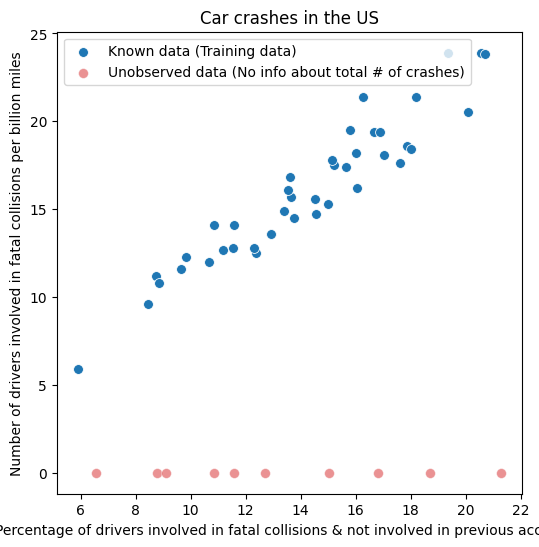

In [3]:
# Separate the dataset into training and test sets (80/20 split)
train = data.sample(frac=0.8, random_state=0)
test = data.drop(train.index)

# Set figure size
plt.figure(figsize=(6, 6))

# Plot both datasets
sns.scatterplot(x='no_previous', y='total', data=train, s=50, label='Known data (Training data)')
ys = np.array([0]* len(test))
sns.scatterplot(x='no_previous', y=ys, data=test, s=50, color='tab:red', alpha=0.5, label='Unobserved data (No info about total # of crashes)')

# Add axis labels and title
plt.xlabel('Percentage of drivers involved in fatal collisions & not involved in previous accidents')
plt.ylabel('Number of drivers involved in fatal collisions per billion miles')
plt.title('Car crashes in the US')

# Show the plot
plt.show()

### Linear Regression Model

To predict the total number of car collisions based on the percentage of drivers involved in fatal collisions and not involved in previous accidents we may want to construct a mathematical model that would describe the relationship between two variables in the best possible way. 

One idea is the linear regression model, which assumes that the relationship between the input variable $x$ and the output variable $y$ is linear. In our case, it is pretty straightforward to expect a linear relationship between these two variables: the more there are naive drivers in the car collision, the more car collisions there will be in general. At least, this is something reasonable to expect.

The equation for a simple linear regression model with one independent variable can be expressed as:

\begin{gather*}
\hat{y} = \beta_0 + \beta_1 x + \epsilon
\end{gather*}

where:

- $\hat{y}$ is the predicted value of dependent variable
- $x$ is the independent variable
- $\beta_0$ is the y-intercept or constant term
- $\beta_1$ is the regression coefficient or slope
- $\epsilon$ is the error term or residual

The equation for multiple linear regression with more than one independent variable can be written as:

\begin{gather*}
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon
\end{gather*}

> Terminology note: in machine learning the parameters of the model are often called *weights* or *coefficients*. In this case, $\beta_0$ and $\beta_1$ are the weights of the model. The parameter $\epsilon$ is often called *bias*. 

Having this model, the only thing that is left to us is to obtain the values of the coefficients $\beta_0$, $\beta_1$, and $\epsilon$. Then we will be able to feed our model with new unobserved data points and it will return the predicted value of the target variable. On the graph below try to manually fit the line to the data points and explore the values of $\beta_0$ and $\beta_1$ you get. 

<div align="center">
    <img src="https://i.ibb.co/rmt2947/model.png">
</div>

In [4]:
# Define the plotting function
@widgets.interact(beta_0 = widgets.FloatSlider(min=0, max=10, step=0.1, value=0), beta_1=widgets.FloatSlider(min=0, max=10, step=0.1, value=0), epsilon=widgets.FloatSlider(min=0, max=10, step=0.1, value=0))
def plot_regression1(beta_0, beta_1, epsilon):
    # Set the figure size
    plt.figure(figsize=(6, 6))

    # Define the regression line
    xs = np.arange(min(train['no_previous']) - 5, max(train['no_previous']), 1)
    total = beta_0 + beta_1 * xs + epsilon
    
    # Plot the data and regression line
    sns.scatterplot(x='no_previous', y='total', data=train, s=50, label='Known data')
    sns.lineplot(x=xs, y=total, color='tab:orange', label='Regression model')
    
    # Add axis labels and title
    plt.xlabel('Percentage of drivers involved in fatal collisions not involved in previous accidents')
    plt.ylabel('Number of drivers involved in fatal collisions per billion miles')
    plt.title('Car crashes in the US linear regression model')
        
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='beta_0', max=10.0), FloatSlider(value=0.0, descripti…

### "How well did we do?" - Loss Function

How well did we do? How can we tell it? In machine learning, we define the *error function* (also called *the loss function*) to help us tell how well we did. One of the possible loss functions is *the sum of squares*.

The *sum of squares* loss function is commonly used in linear regression to measure the difference between the predicted values and the actual values of the dependent variable. The equation for the sum of the squares loss function can be expressed as:

\begin{gather*}
L(\beta_0, \beta_1, \dots, \beta_p) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon))^2
\end{gather*}

where:

- $L$ is the sum of the squares loss function
- $y_i$ is the actual value of the dependent variable for the $i$-th observation
- $\beta_0, \beta_1, \dots, \beta_p$ are the regression coefficients or weights
- $x_{i1}, x_{i2}, \dots, x_{ip}$ are the independent variables for the $i$-th observation
- $n$ is the total number of observations

This can be rewritten as:
\begin{gather*}
L(\beta_0, \beta_1, \dots, \beta_p) = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{gather*}

where:
- $\hat{y}_i$ is the predicted value of the dependent variable for the $i$-th observation
- and the rest is the same

The goal of linear regression is to estimate the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals, which is the sum of the squared differences between the actual values of $y$ and the predicted values of $y$ based on the regression equation.

In the below cell set the best obtain values of $\beta_0$, $\beta_1$, and $\epsilon$ and run the cell to see how well you did.

> Terminology note: in order to compute the loss function we need to know the actual values of the target variable. In machine learning, we usually split the dataset into two parts: *training set* and *test set*. The training set is used to train the model (this is what we used in the interactive graph above), i.e. to find the best values of the parameters of the model. The test set is used to evaluate the performance of the model, for this purpose, we will use the so-called unobserved data from the first graph in the lecture (because I lied to you and we actually know the values of the target variable for these data points!). All that time it was our *test set*.

In [23]:
# Set beta_1 and epsilon
beta_0 = 0.3
beta_1 = 1.5
epsilon = 0.2

Sum of Squared Errors = 345.0936442500001


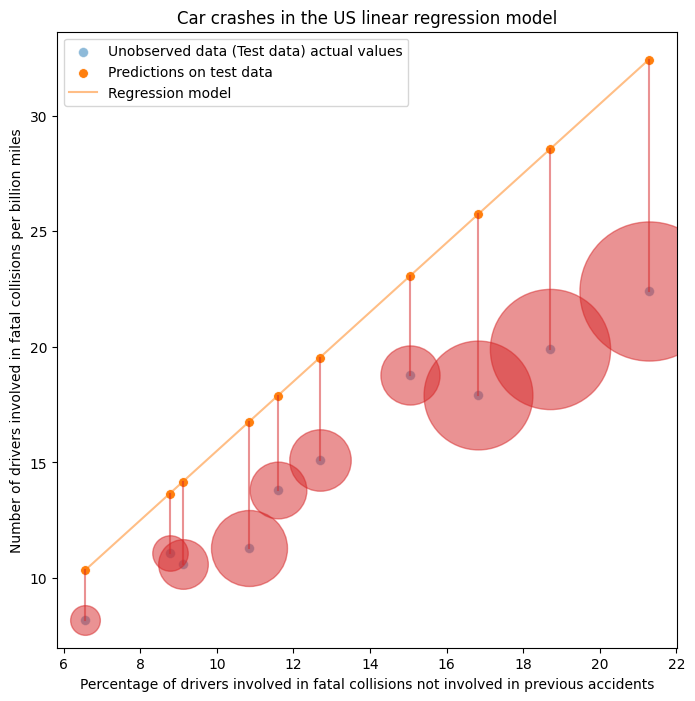

In [6]:
# Set the figure size
plt.figure(figsize=(8, 8))

beta_0 = float(beta_0)
beta_1 = float(beta_1)
epsilon = float(epsilon)

# Define the regression line
xs = test['no_previous']

# Make predictions on the test set
predictions = beta_0 + beta_1 * xs + epsilon

# Plot the test data, predictions and regression line
sns.scatterplot(x='no_previous', y='total', data=test, s=50, color='tab:blue', alpha=0.5, label='Unobserved data (Test data) actual values')
sns.scatterplot(x=test['no_previous'], y=predictions, s=50, color='tab:orange', label='Predictions on test data')
sns.lineplot(x=xs, y=predictions, color='tab:orange', label='Regression model', alpha=0.5)

# Plot error
for i in range(len(test)):
    plt.plot([test['no_previous'].iloc[i], test['no_previous'].iloc[i]], [test['total'].iloc[i], predictions.iloc[i]], color='tab:red', alpha=0.5)
    # Plot size of error as a circle
    plt.scatter(test['no_previous'].iloc[i], test['total'].iloc[i], s=(test['total'].iloc[i] - predictions.iloc[i])**2 * 100, color='tab:red', alpha=0.5)


# Print Sum of Squared Errors formula and value
print('Sum of Squared Errors =', np.sum((test['total'] - predictions) ** 2))

# Add axis labels and title
plt.xlabel('Percentage of drivers involved in fatal collisions not involved in previous accidents')
plt.ylabel('Number of drivers involved in fatal collisions per billion miles')
plt.title('Car crashes in the US linear regression model')

# Show the plot
plt.show()

The size of the circle around each unobserved data point is growing respectively with the size of the error for this data point. Try to experiment again with different parameters $\beta_{0}$, $\beta_{1}$,$\epsilon$ (you can do it in the cell above by setting the respective variables to some values). Compare the output of the Sum of Squared Errors with your personal observation. Could you tell which parameters work better and if it agrees with a numerical value of the loss function?

We can also plot the loss function (since it is a function obviously) and observe on the graph where the minimum value is. In the cell below try to fit the regression line manually but this time look at what is happening to loss function while you do it! 

In [7]:
def calculate_sum_of_squared_errors(targets, predictions):
    # Calculate the sum of squared errors for a given beta
    return np.sum((targets - predictions) ** 2)

def plot_train_errors(xs, targets, predictions, ax):
    # Plot the errors for the train data
    for i in range(len(xs)):
        ax.plot([xs.iloc[i], xs.iloc[i]], [targets.iloc[i], predictions.iloc[i]], color='tab:red', alpha=0.5)
        ax.scatter(xs.iloc[i], targets.iloc[i], color='tab:red', alpha=0.5, s=abs(targets.iloc[i] - predictions.iloc[i]) * 100)

# Add widgets to change the coefficients
@widgets.interact(selected_beta_1=widgets.FloatSlider(min=0, max=2, step=0.01, value=1))
def plot_regression(selected_beta_1):
    # Create figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Plot the training data
    sns.scatterplot(x='no_previous', y='total', data=train, s=50, label='Known data (Train data)', ax=ax[0])
    
    # Plot the regression line with the selected coefficients
    xs = train['no_previous']
    predictions = selected_beta_1 * xs
    sns.lineplot(x=xs, y=predictions, color='tab:orange', label='Regression model', alpha=0.5, ax=ax[0])
    
    # Calculate and plot the sum of squared errors for different beta values
    beta_1_values = np.arange(0, 2, 0.1)
    errors = []
    for beta_1 in beta_1_values:
        error = calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * beta_1)
        errors.append(error)
    
    # Plot the sum of squared errors
    ax[1].plot(beta_1_values, errors)
    ax[1].scatter(selected_beta_1, calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * selected_beta_1), color='tab:red', s=100)
    ax[1].set_xlabel('Value of beta')
    ax[1].set_ylabel('Sum of squared errors')
    
    # Plot the errors for train data
    targets = train['total']
    plot_train_errors(xs, targets, predictions, ax[0])
    
    # Set axis labels and legends
    ax[0].set_xlabel('Percentage of drivers involved in fatal collisions not involved in previous accidents')
    ax[0].set_ylabel('Number of drivers involved in fatal collisions per billion miles')
    ax[0].set_title('Car crashes in the US linear regression model')
    ax[1].set_title(r'Sum of squared errors for different values of $\beta_{1}$')
    ax[1].set_xlabel(r'$\beta_{1}$')
    ax[1].set_ylabel('Sum of squared errors')
    ax[0].legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='selected_beta_1', max=2.0, step=0.01), Output()), _d…

> Terminology note: The process of finding the best position for the line is called *fitting* or *training* (term *training* is not often used for linear regression model, *fitting* is more common, but in principle it is the same process). The best fit line is the line that minimizes the sum of the squared errors, same as the best fit *weights* minimise the *error function* for neural networks. Here, we have used sum of squares to estimate the error of the model, in neural networks as well as in other algorithms other error functions are used but most of them (including sum of squares) are derived from *maximum likelihood principle*. 

In sum of squares for 2 variables, the error function looks quite simple and it is feasible to estimate best possible value manually. Just for curiosity this is how error function can look for 2 variables in deep neural networks. Click on [link](http://www.telesens.co/loss-landscape-viz/viewer.html) to explore it interactively.

<div align="center", style="width: 30%">
    <img src="https://i.ibb.co/kmRBTXW/noshort.png">
</div>

### "How can we find the best fit line (automatically)?" - Stochastic Gradient Descent

The same process of finding the best position for the line can be done automatically by using **gradient descent** algorithm. The idea is to start with some random values of $\beta_0$ and $\beta_1$ and then iteratively update them in the direction that minimizes the loss function. The equation for the stochastic gradient descent can be expressed as: 

\begin{gather*}
\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} L(\beta_0, \beta_1, \dots, \beta_p)
\end{gather*}

where:

- $\beta_j$ is the $j$-th regression coefficient
- $\alpha$ is the learning rate
- $L$ is the sum of squares loss function

> Terminology note: The gradient descent is called stochastic when the loss function is computed for a single data point at a time. The gradient descent is called batch when the loss function is computed for all data points at a time.

In [8]:
def calculate_sum_of_squared_errors(targets, predictions):
    # Calculate the sum of squared errors for a given beta
    return np.sum((targets - predictions) ** 2)

def plot_train_errors(xs, targets, predictions, ax):
    # Plot the errors for the train data
    for i in range(len(xs)):
        ax.plot([xs.iloc[i], xs.iloc[i]], [targets.iloc[i], predictions.iloc[i]], color='tab:red', alpha=0.5)
        ax.scatter(xs.iloc[i], targets.iloc[i], color='tab:red', alpha=0.5, s=abs(targets.iloc[i] - predictions.iloc[i]) * 100)

def update_beta(beta, learning_rate, xs, targets, predictions):
    # Compute the gradient
    gradient = compute_gradient(xs, targets, predictions)
    return beta - learning_rate * gradient, gradient, beta

def compute_gradient(xs, targets, predictions):
    # Compute the gradient for all the data points iteratively
    gradients = []
    for i in range(len(xs)):
        # Compute the gradient for a single data point
        gradient = 2 * (predictions.iloc[i] - targets.iloc[i]) * xs.iloc[i]
        gradients.append(gradient)
    return np.mean(gradients)

def plot_regression(selected_beta_1, gradient, previous_beta, learning_rate, ax):
    # Plot the training data
    sns.scatterplot(x='no_previous', y='total', data=train, s=50, label='Known data (Train data)', ax=ax[0])
    # Plot the regression line with the selected coefficients
    xs = train['no_previous']
    predictions = selected_beta_1 * xs
    sns.lineplot(x=xs, y=predictions, color='tab:orange', label='Regression model', alpha=0.5, ax=ax[0])
    
    # Plot the errors for train data
    targets = train['total']
    plot_train_errors(xs, targets, predictions, ax[0])

    # Calculate all the sum of squared errors for different beta values
    beta_1_values = np.arange(0, 2, 0.1)
    errors = []
    for beta_1 in beta_1_values:
        error = calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * beta_1)
        errors.append(error)
    
    # Plot the loss function
    ax[1].plot(beta_1_values, errors)
    # plot our current beta value
    ax[1].scatter(selected_beta_1, calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * selected_beta_1), color='tab:red', s=100)
    
    # Plot the tangent line
    if gradient:
        x_1 = previous_beta
        y_1 = calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * previous_beta)
        x_2 = selected_beta_1
        y_2 = calculate_sum_of_squared_errors(targets=test['total'], predictions=test['no_previous'] * selected_beta_1)
        m = (y_2 - y_1) / (x_2 - x_1)
        b = y_1 - m * x_1
        tangent_line = m * beta_1_values + b
        ax[1].plot(beta_1_values, tangent_line, color='tab:orange', alpha=0.5, label='Tangent line', linestyle='--', linewidth=2)

        # Add text with the formula for new beta and the new value
        ax[1].text(0.6, 0.9, r'$\beta_{1} = \beta_{1} - \alpha \cdot \frac{\partial L}{\partial \beta_{1}}$', transform=ax[1].transAxes)
        ax[1].text(0.6, 0.7, f'New beta: {selected_beta_1:.5f}', transform=ax[1].transAxes)
        ax[1].text(0.6, 0.8, f'Gradient: {(gradient):.5f}', transform=ax[1].transAxes)

    # Set axis labels and legends
    ax[1].set_xlabel('Value of beta')
    ax[1].set_ylabel('Sum of squared errors')
    
    # Set axis labels and legends
    ax[0].set_xlabel('Percentage of drivers involved in fatal collisions not involved in previous accidents')
    ax[0].set_ylabel('Number of drivers involved in fatal collisions per billion miles')
    ax[0].set_title('Car crashes in the US linear regression model')
    ax[1].set_title(r'Sum of squared errors for different values of $\beta_{1}$')
    ax[1].set_xlabel(r'$\beta_{1}$')
    ax[1].set_ylabel('Sum of squared errors')
    ax[0].legend()
    plt.show()
    

@widgets.interact(epochs=widgets.Play(interval=1,value=0,min=0,max=1000,step=1, description="Epochs"), learning_rate=widgets.FloatText(min=0.00001, max=0.001, step=0.00001, value=0.00001))
def plot_sgd(epochs, learning_rate):
    # Plot the regression line with the selected coefficients
    __, ax = plt.subplots(1, 2, figsize=(18, 6))
    beta_1 = 0
    gradient = None
    previous_beta = None

    # Run the gradient descent algorithm for the selected number of epochs
    for epoch in range(int(epochs)):
        beta_1, gradient, previous_beta = update_beta(beta_1, learning_rate, train['no_previous'], train['total'], beta_1 * train['no_previous'])
    
    # Plot all the data
    plot_regression(beta_1, gradient, previous_beta, learning_rate, ax)

interactive(children=(Play(value=0, description='Epochs', interval=1, max=1000), FloatText(value=1e-05, descri…

### "Where things can go wrong?" - Overfitting and Underfitting

We are going to leave behind our example data and for now, we will experiment with another type of dataset, this time with synthetic data (but let's pretend they are real).

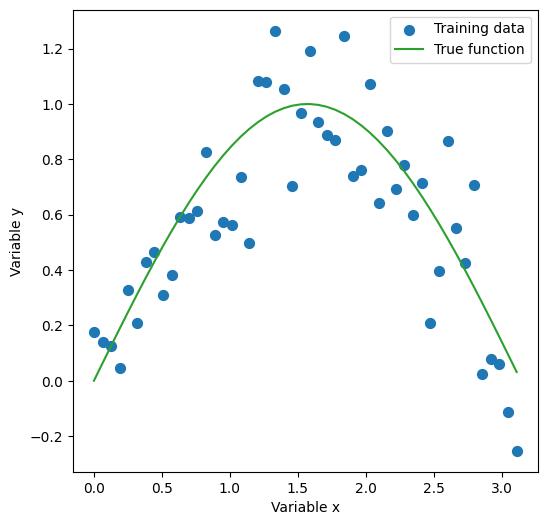

In [9]:
# Simulate noisy sine wave
xs = np.linspace(0, np.pi, 100)
ys = np.sin(xs) + np.random.normal(0, 0.2, 100)
# remove some data pointsxs
xs = xs[::2]
ys = ys[::2]

# compute true sine wave
y_true = np.sin(xs)

# plot the data
plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, s=50, label='Training data')
plt.plot(xs, y_true, color='tab:green', label='True function')
plt.xlabel('Variable x')
plt.ylabel('Variable y')
plt.legend()
plt.show()

Apart from anything else, try to think how well would our previous model work on this data. Hopefully, your answer is likely to be "not very well". The reason is that the nature of the data is not linear. The data points are not distributed along a straight line. And some polynomial functions would be a better fit for this data. To overcome this and still use the same model we will introduce polynomial features, basically, we will add new features to the dataset that are powers of the original features. It will help us to approximate non-linear functions with a linear function.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

@widgets.interact(number_of_features=widgets.IntSlider(min=1, max=100, step=1, value=1))
def plot_polynomial_regression(number_of_features):
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    # Add second order polynomial features
    poly = PolynomialFeatures(degree=number_of_features)
    x_poly = poly.fit_transform(xs.reshape(-1, 1))

    # Fit the model
    model = LinearRegression()
    model.fit(x_poly, ys)

    # Predict the values
    y_pred = model.predict(x_poly)

    # Plot the data
    ax[0].scatter(xs, ys, s=50, label='Training data')
    ax[0].plot(xs, y_pred, color='tab:orange', label='Regression model', alpha=0.5)
    ax[0].plot(xs, y_true, color='tab:green', label='True function')
    ax[0].set_xlabel('Variable x')
    ax[0].set_ylabel('Variable y')
    ax[0].legend()

    # Compute losses for different number of features
    losses = []
    for degree in range(1, 101):
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(xs.reshape(-1, 1))
        model = LinearRegression()
        model.fit(x_poly, ys)
        y_pred = model.predict(x_poly)
        loss = np.mean((y_pred - ys) ** 2)
        losses.append(loss)
    
    # Plot the losses
    ax[1].plot(range(1, 101), losses)
    ax[1].scatter(number_of_features, losses[number_of_features - 1], color='tab:red', s=100)
    ax[1].set_xlabel('Number of features')
    ax[1].set_ylabel('Loss')
    plt.show()

interactive(children=(IntSlider(value=1, description='number_of_features', min=1), Output()), _dom_classes=('w…

You can observe that the more features you add (meaning more parameters to the model as well), the better the model is... up to the point. If you go even further more parameters will start to actually spoil the model and it will start to overfit the data. This is the problem of *overfitting*. The model is too complex and it is able to fit the noise in the data as well. The model is not able to generalize well and it will perform poorly on the new data. 
When there are, in contrast, not enough features, the model is too simple and it is not able to fit the data well. This is the problem of *underfitting*. You can read and check a similar experiment [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py).

The part of the truth:
<div align="center">
    <img src="https://i.ibb.co/qFrXQx0/overfitting.png">
</div>

The whole truth:
<div align="center">
    <img src="https://i.ibb.co/k048kxZ/gen-double.png">
<div>

(Optionally) go to this [web](https://openai.com/research/deep-double-descent) for more details.

It will be also relevant for neural networks, as sometimes large models tend to overfit. This means that instead of actually understanding the topic, they just memorize every single example from the training set. When new (unseen) data come, they tend to fail. 
The problem of underfitting and overfitting is the main thing that you should keep in mind when you are working with neural networks. 

> Note: it is also not the whole truth, actually surprisingly people found out that for very large models (meaning large deep neural networks) the solution can be to use even more parameters.

So, in a nutshell, the machine learning is about:
- finding the right model
- finding the good loss function for the model
- finding the right balance between the complexity of the model and the generalization to prevent overfitting and underfitting

## Towards Neural Networks - Perceptron

So, what about neural networks? Well, they are just a bunch of linear models combined together. The simplest neural network is called *perceptron*. We can imagine the simplest form of it with only a single layer. The neuron is a linear model with a non-linear activation function. The activation function is used to introduce non-linearity to the model. 

The activation function is needed to introduce non-linearity to the model. The most common activation functions are:
- sigmoid
- tanh
- ReLU

The sigmoid function is defined as:

\begin{gather*}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{gather*}


<div align="center">
    <img src="https://i.ibb.co/N1BQ5X2/preceptron.png">
</div>

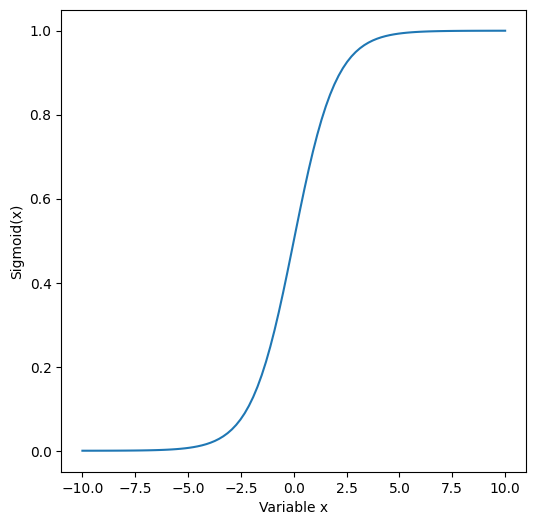

In [11]:
# Generate sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create data
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the data
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.xlabel('Variable x')
plt.ylabel('Sigmoid(x)')
plt.show()

The sigmoid function is especially useful for classification tasks because it outputs values between 0 and 1. The output can be interpreted as the probability of the data point belonging to a particular class. See below what the sigmoid function looks like. The class is usually defined as 1 if the probability is greater than 0.5 and 0 otherwise.

You can see how this approach is more powerful than linear regression because of its non-linearity.

### Multilayer Perceptron

The whole actual trick besides activations happens when we add more layers to the network. The more layers we add, the more complex functions we can approximate. The more complex functions we can approximate, the more complex problems we can solve. But keep in mind overfitting issue.

<div align="center">
    <img style="width:50%" src="https://i.ibb.co/6w6DqLn/perceptron.png">
</div>

## Bonus: Other approaches in Machine Learning. Decision trees for segmentation

In [22]:
from skimage import data
from PIL import Image

By this time you may be familiar with the [Trainable Weka Segmentation](https://imagej.net/plugins/tws/) tool in Fiji or [Ilastik](https://www.ilastik.org/). Both these tools use machine learning (note not deep learning) algorithms to solve the task of pixel classification. More precisely they are using random forest classifier to do it. The random forest classifier just as a name suggest consist of multiple (decision) trees. This is called ensemble methods in machine learning. The central idea of an ensemble is relatively simple. Given that each individual classifier performs the task with some mistake, when taken collectively these mistakes would cancel out since the mistake is random and the final decision is made by the majority of votes. 

The decision tree (the one unit of the random forest) is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. To give a simple example: the segmentation of images by traditional thresholding can be seen as a very primitive decision tree. In this example, the decision is made based on the rule pixel being bigger than some threshold value. If yes, the pixel is classified as an object, otherwise, it is classified as background. 

You can learn more about decision trees [here](https://scikit-learn.org/stable/modules/tree.html#tree).

In this tutorial, you can look more closely at how Weka Segmentation and Ilastik function inside. And also get some insights into how even relatively simple machine learning methods can be efficient in tackling complex bioimage tasks. 

> Important note: There is basically no such task as segmentation. To say that we are going to segment the image means that we are going to classify each pixel of the image into one of the classes.

<div align="center">
    <img src="https://i.ibb.co/K2YCpXP/decision-trees.png">
</div>

We will explore how it can be applied to machine learning on the simple example of cell nuclei. The image is a 2D array of shape (height, width). The values of the pixels are between 0 and 255. This example that you will work with uses the manually created annotations for some parts of the image. You will train the classifier on this parts and then use it to predict masks for whole image. 

In [20]:
!curl https://raw.githubusercontent.com/IMCF-Biocev/NNBA-2023/main/annotations.png --output annotations.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1679  100  1679    0     0  18441      0 --:--:-- --:--:-- --:--:--     0-- --:--:-- 19523


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


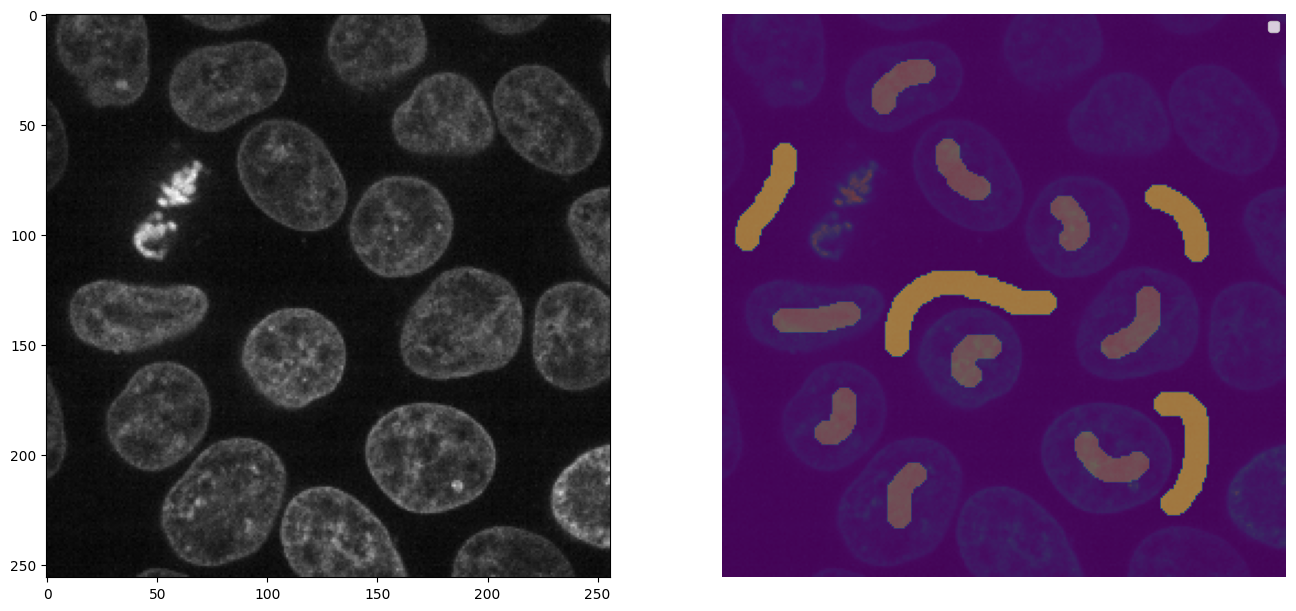

In [21]:
# Read 3D image
img = data.cells3d() 
# Load annotations from png
annotations = np.array(Image.open('annotations.png'))

# Select a single 2D plane and take only second channel
img = img[31][1]

# Plot the image and the annotations
nuclei_mask = annotations == 2
background_mask = annotations == 1

# Create figure for 2 plots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[1].imshow(img)
ax[1].imshow(nuclei_mask, alpha=0.5, label='Nuclei')
ax[1].imshow(background_mask, alpha=0.5, label='Background')
ax[1].axis('off')
ax[1].legend()

ax[0].imshow(img, cmap='gray')
plt.show()

In our simple example with just traditionall thresholding this didn't work well because it only considered usual intensities (if you want to check it you can try implementing thresholding yourself!). For this to work better we want to also consider possible modifications or other features on the image. We will use a set of filters to generate it:
1. Gaussian filter will generate slightly blurred (denoised) image,
2. Sobel filter will generate image with only edges of objects visible
3. Laplacian filter will also generate image with only edges of objects visible but in a different way than Sobel filter

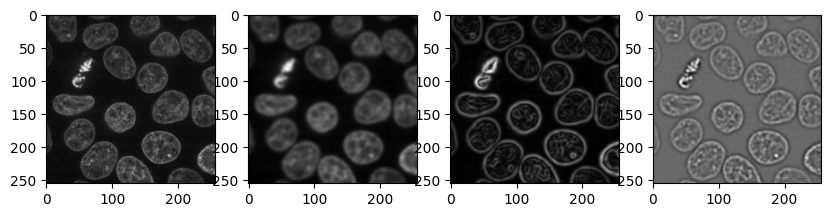

In [13]:
def generate_features(image):
    # Apply Gaussian filter to image with sigma=2
    blurred = filters.gaussian(image, sigma=2)

    # Apply Sobel filter to blurred image to detect edges
    edges = filters.sobel(blurred)

    # Apply Canny filter to blurred image to detect edges
    edges2 = filters.laplace(blurred)

    # Collect image, blurred, and edges features in a stack
    feature_stack = [image.ravel(), blurred.ravel(), edges.ravel(), edges2.ravel()]

    # Return stack as numpy-array
    return np.asarray(feature_stack)

feature_stack = generate_features(img)

fig, axes = plt.subplots(1, 4, figsize=(10,10))

# reshape(image.shape) is the opposite of ravel() here. We just need it for visualization.
axes[0].imshow(feature_stack[0].reshape(img.shape), cmap=plt.cm.gray)
axes[1].imshow(feature_stack[1].reshape(img.shape), cmap=plt.cm.gray)
axes[2].imshow(feature_stack[2].reshape(img.shape), cmap=plt.cm.gray)
axes[3].imshow(feature_stack[3].reshape(img.shape), cmap=plt.cm.gray)

In [14]:
def format_data(feature_stack, annotation):
    # Transpose feature stack to match scikit-learn format
    X = feature_stack.T

    # Convert annotation to a 1D array
    y = annotation.ravel()

    # Remove pixels that have not been annotated
    mask = y > 0
    X = X[mask]
    y = y[mask]

    # Return formatted data
    return X, y

X, y = format_data(feature_stack, annotations)

Now we can train Decision Tree Classifier. The classifier will be trained on the features that we have generated. The features are the intensities of the pixels in the images. The target is the class of the pixel. The class is either 0 (background) or 1 (foreground). The classifier will learn to predict the class of the pixel based on the intensity of the pixel.

In [15]:
from sklearn import tree

# Create decision tree classifier
classifier = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
# Fit classifier to data
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

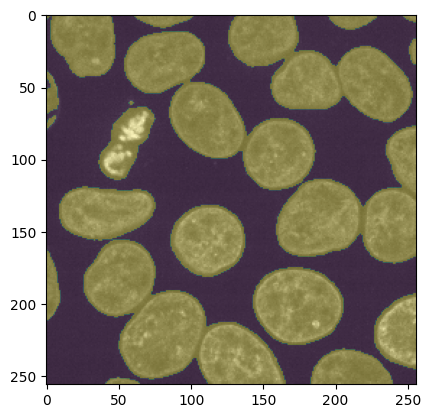

In [16]:
# Predict labels for all pixels in the image
result_1d = classifier.predict(feature_stack.T)
result_2d = result_1d.reshape(img.shape)
plt.imshow(img, cmap=plt.cm.gray, alpha=0.8)
plt.imshow(result_2d, alpha=0.3)

We can also check how well it would perform on other images (taken from the same stack).

(256, 256)


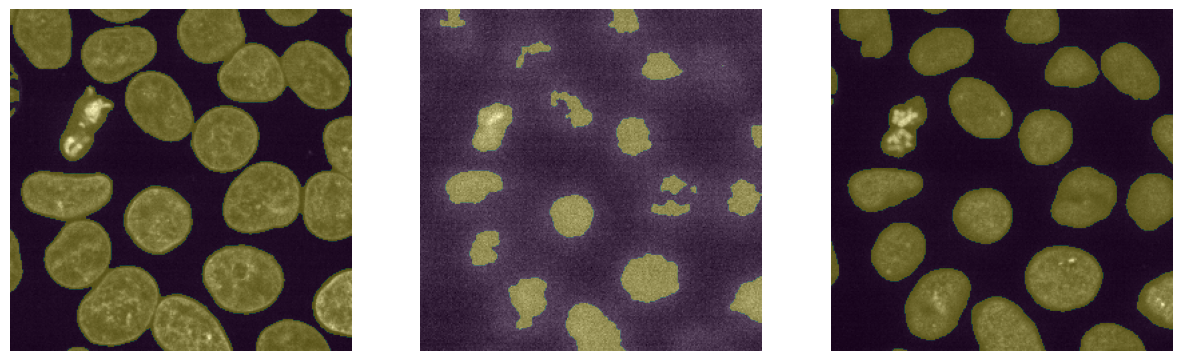

In [17]:
img = data.cells3d() # read 3D image

imgs = [img[35][1], img[19][1], img[24][1]]
imgs = np.asarray(imgs)

print(imgs[1].shape)
# predict the labels and plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    # generate features
    feature_stack = generate_features(imgs[i])
    # train classifier
    result_1d = classifier.predict(feature_stack.T)
    result_2d = result_1d.reshape(imgs[i].shape)
    axes[i].imshow(imgs[i], cmap=plt.cm.gray)
    axes[i].imshow(result_2d, alpha=0.3)
    axes[i].axis('off')
plt.show()

Again, the decision tree works by creating simple rules that it follows. Let's check what these rules were here. 

[Text(0.5, 0.75, 'x[1] <= 0.111\ngini = 0.497\nsamples = 6292\nvalue = [2914, 3378]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2914\nvalue = [2914, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3378\nvalue = [0, 3378]')]

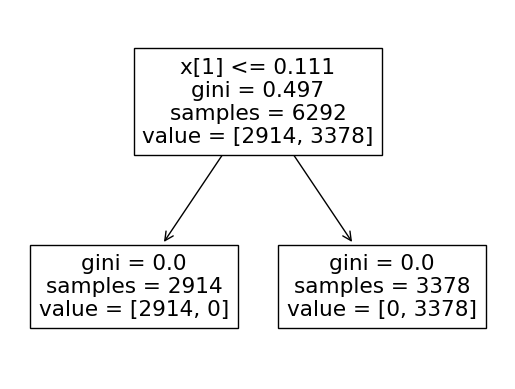

In [18]:
tree.plot_tree(classifier)

You can see that it used only second feature (Gaussian filter) to make the decision. And then it arrived at the best possible value to split the data. The best possible split is defined using the special criterium which is the same concept as the loss function in neural networks. The criterium is called Gini impurity. The lower the Gini impurity, the better the split. The Gini impurity is defined as:

\begin{gather*}
\text{Gini} = 1 - \sum_{i=1}^{n} p_i^2
\end{gather*}

where $p_i$ is the probability of the class $i$. The Gini impurity forces the data after separation to be as uniform as possible (only one class should be present).  

## Resources

There is very little chance to cover all the topics in this tutorial. So, if you want to learn more about machine learning, I recommend you to check out the following resources. 

1. If you want to understand the basics:

- [StatQuest with Josh Starmer](https://www.youtube.com/@statquest)

- [Neural networks playlist by 3Blue1Brown ](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

2. If you want to dive deeper:

- [Machine Learning course by Andrew Ng](https://www.coursera.org/learn/machine-learning)

- [Deep Learning course by Andrew Ng](https://www.coursera.org/specializations/deep-learning)

- [Deep Learning book by Ian Goodfellow, Yoshua Bengio and Aaron Courville](https://www.deeplearningbook.org/)

- [Deep Learning course by Fast.ai](https://course.fast.ai/)